# Image Compression


## Ảnh
Ảnh là sự kết hợp của các pixel trong thế giới kỹ thuật số. Giống như một mặt phẳng 2D, ảnh cũng có mặt phẳng và chỉ có tọa độ dương. Tôi sẽ sử dụng Python để thực hiện các thao tác trên ảnh vì nó dễ lập trình.


* Tạo và thử nghiệm với ảnh giả

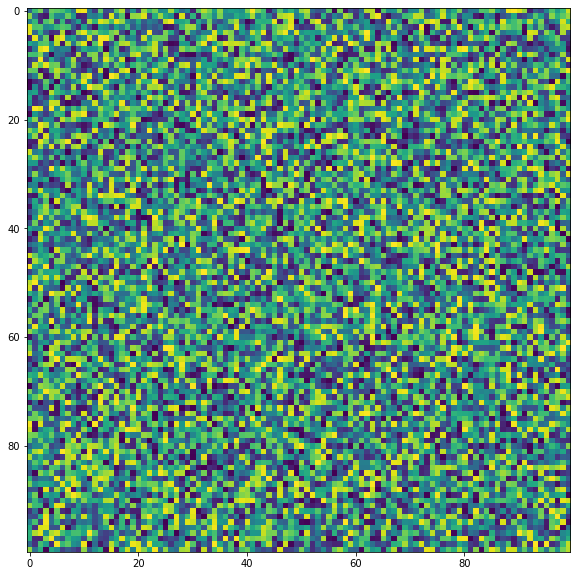

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os

def show(img, figsize=(10, 10), title="Image"):
    figure=plt.figure(figsize=figsize)
    
    plt.imshow(img)
    plt.show()

dummy = np.random.randint(0, 255, (100, 100)).astype(np.uint8)
show(dummy)

In [2]:
# Kích thước của ảnh giả
sys.getsizeof(dummy)/1024

9.890625

In [3]:
# ghi ảnh ra file
cv2.imwrite("d.png", dummy)

True

In [4]:
# đọc ảnh theo grayscale
img = cv2.imread("d.png", 0)

In [5]:
# kích thước
sys.getsizeof(img)/1024

9.890625

**Tạo một ảnh trống và kiểm tra kích thước**

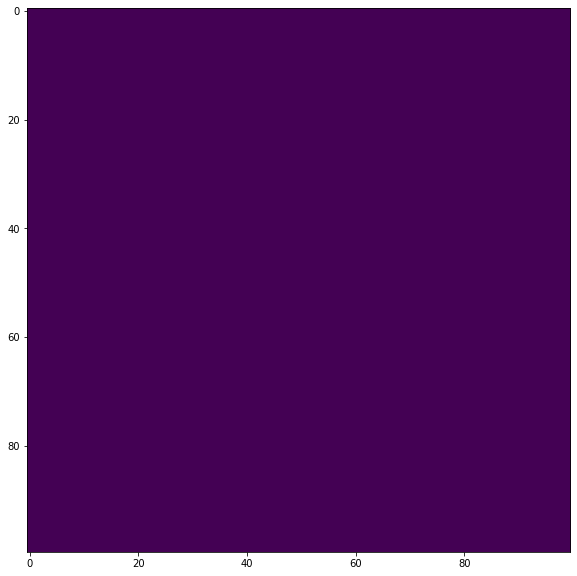

In [6]:
dd = np.zeros((100, 100)).astype(np.uint8)
show(dd)

In [7]:
sys.getsizeof(dd)/1024

9.890625

In [8]:
cv2.imwrite("dd.png", dd)

True

In [9]:
# Hàm đọc kích thước file
def get_size(filename="dd.png"):
    stat = os.stat(filename)
    size=stat.st_size
    return size

print(get_size())

print(get_size("d.png"))

214
10180


Kết quả cho thấy 2 ảnh cùng kích thước (dimension) nhưng file lưu lại khác nhau

## Run Length Encoding


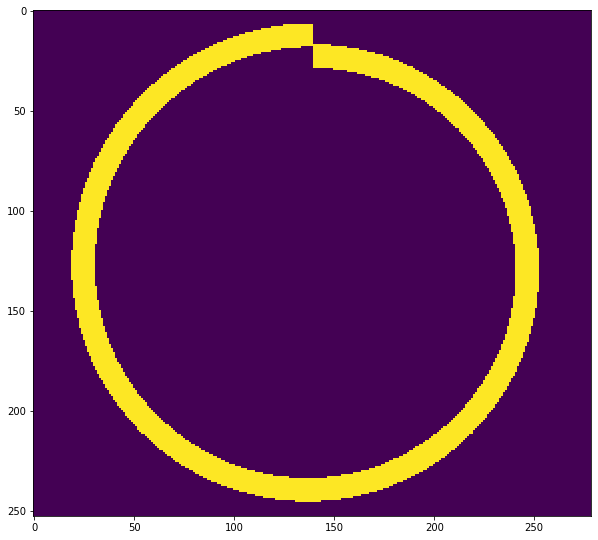

array([[255,   0],
       [255,   0],
       [255,   0],
       ...,
       [255,   0],
       [255,   0],
       [ 48,   0]])

In [10]:
# read graysclae img
def RLE_encoding(img, bits=8,  binary=True, view=True):
    """
    img: Grayscale img.
    bits: what will be the maximum run length? 2^bits       
    """
    if binary:
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    if view:
        show(img)

    encoded = []
    shape=img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    th=127
    for pixel in fimg:
        if binary:
            if pixel<th:
                pixel=0
            else:
                pixel=1
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))
    
    return np.array(encoded)
fpath="bg20.png"
img = cv2.imread(fpath, 0)
shape=img.shape
encoded = RLE_encoding(img, bits=8)
encoded

### Decode Function

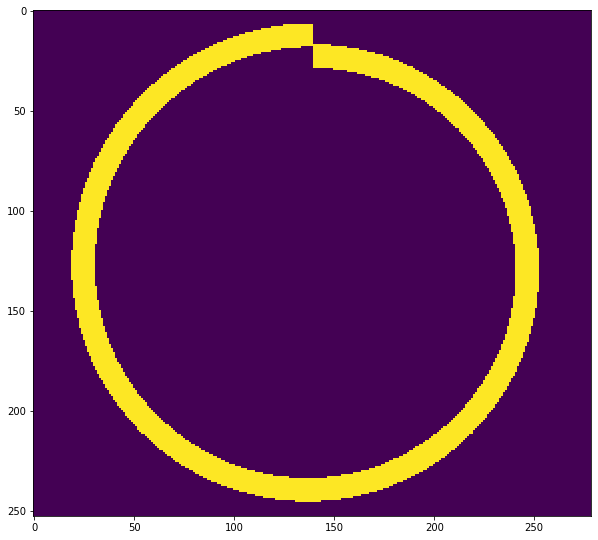

In [11]:
# decode
def RLE_decode(encoded, shape):
    decoded=[]
    for rl in encoded:
        r,p = rl[0], rl[1]
        decoded.extend([p]*r)
    dimg = np.array(decoded).reshape(shape)
    return dimg

dimg = RLE_decode(encoded, shape)
show(dimg)

Lưu với các định dạng khác nhau `npz`, `npz.npy`, `tif` và `png` để xem định dạng nào tối ưu nhất.

In [12]:
# lưu dưới dạng npz
earr=np.array(encoded)
# earr=earr.astype(np.uint8)
np.savez("np1.npz", earr)
np.save("np2.npz", earr)

In [13]:
# lưu dưới dạng image
cv2.imwrite("encoded.tif", earr)
cv2.imwrite("encoded.png", earr)

True

Dạng của mảng earr

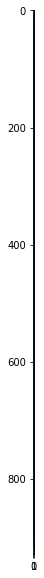

In [14]:
show(earr)

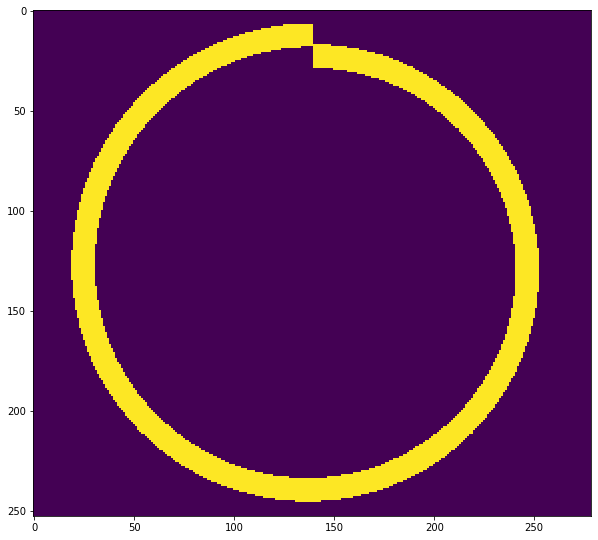

In [15]:
rencd = cv2.imread("encoded.tif", -1)
show(RLE_decode(rencd, shape))

In [16]:
# Kiểm tra kích thước các tập tin
files = ["encoded.png", "encoded.tif", "np1.npz", "np2.npz.npy"]
for f in files:
    print(f"File: {f} => Size: {get_size(f)} Bytes")

File: encoded.png => Size: 2088 Bytes
File: encoded.tif => Size: 3078 Bytes
File: np1.npz => Size: 7696 Bytes
File: np2.npz.npy => Size: 7560 Bytes


=> Lưu dưới dạng png sẽ cho kích thước nhỏ nhất. Lưu ý rằng đây chỉ là dạng lưu của dữ liệu nén, không phải là ảnh ban đầu.

Sử dụng image non-binary

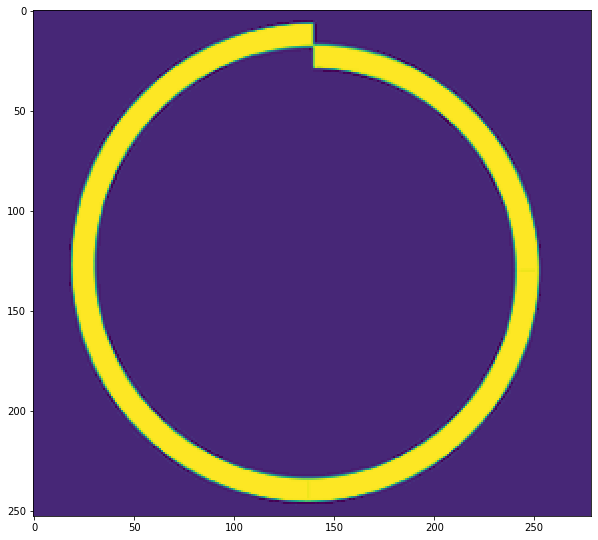

In [17]:
fpath="bg20.png"
img = cv2.imread(fpath, 0)
shape=img.shape
encoded = RLE_encoding(img, bits=8, binary=False)


In [18]:
# lưu thành các định dạng khác nhau
earr=np.array(encoded)
# earr=earr.astype(np.uint8)
np.savez("np11.npz", earr)
np.save("np22.npz", earr)

cv2.imwrite("encoded1.tif", earr)
cv2.imwrite("encoded1.png", earr)



True

In [19]:
# kiểm tra kích thước
files = ["encoded1.png", "encoded1.tif", "np11.npz", "np22.npz.npy"]
for f in files:
    print(f"File: {f} => Size: {get_size(f)} Bytes")

File: encoded1.png => Size: 8071 Bytes
File: encoded1.tif => Size: 12196 Bytes
File: np11.npz => Size: 45360 Bytes
File: np22.npz.npy => Size: 45224 Bytes


Lần nữa ta thấy định dạng png kích thước nhỏ nhất

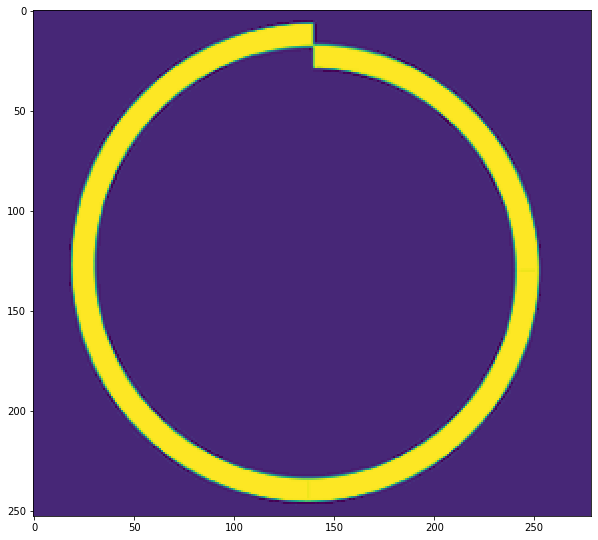

In [20]:
rencd = cv2.imread("encoded1.png", -1)
show(RLE_decode(rencd, shape))

Đây là ảnh xám.

Áp dụng kỹ thuật cho ảnh màu.

## RLE với ảnh RGB

Sử dụng ảnh bên dưới
![](test.bmp)
Kích thước 946x599 và 1662KB.

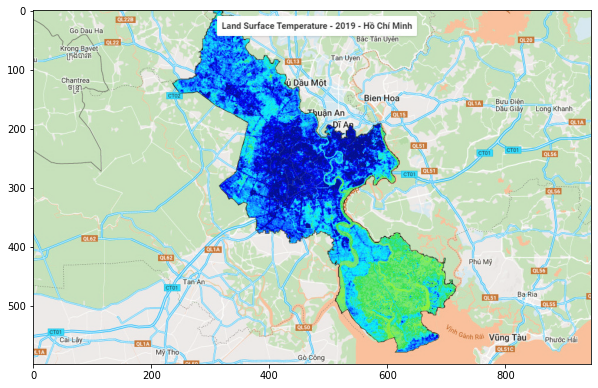

In [21]:
bgr = cv2.imread("test.bmp", 1)
show(bgr)

Do thư viện OpenCV làm việc với hệ màu BGR nên hình ảnh nhìn hơi lạ. Chuyển hệ màu lại cho đúng.

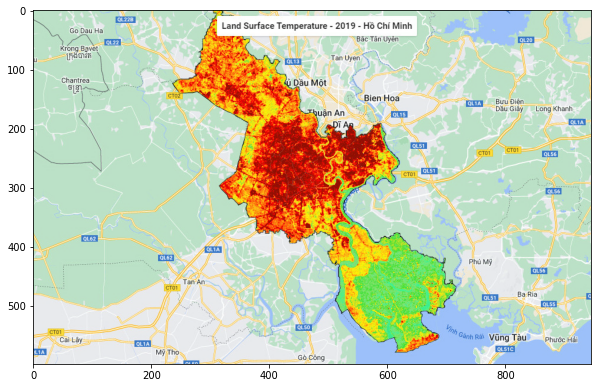

In [22]:
show(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))

Tách từng kênh và áp dụng kỹ thuật nén ảnh xám với từng kênh

In [23]:
b, g, r = bgr[:, :, 0], bgr[:, :, 1], bgr[:, :, 2]

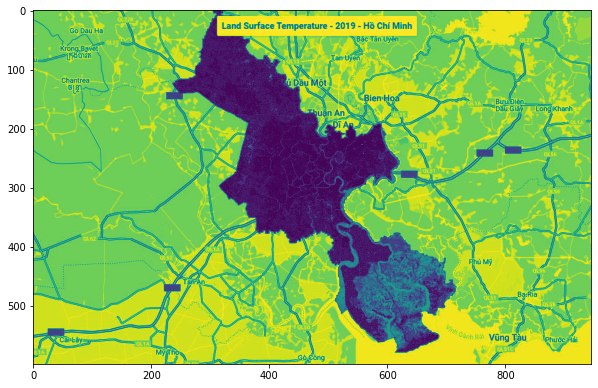

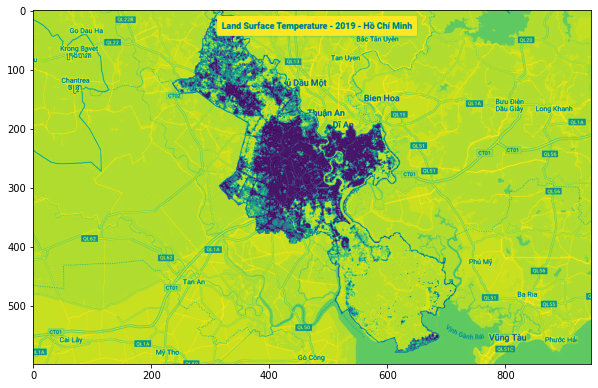

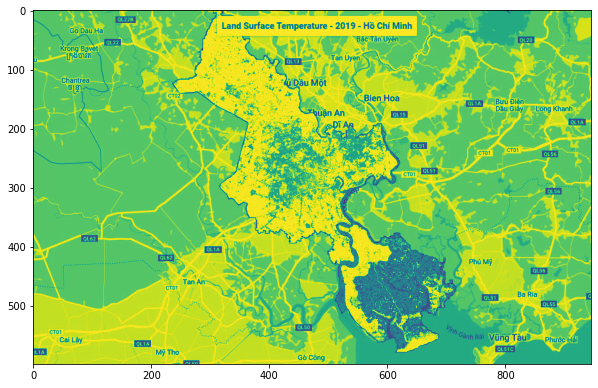

In [24]:
be = RLE_encoding(b, binary=False)
ge = RLE_encoding(g, binary=False)
re = RLE_encoding(r, binary=False)

Xem kích thước mảnh của từng kênh sau khi thực hiện nén

In [25]:
be.shape, ge.shape, re.shape

((406055, 2), (404545, 2), (398870, 2))

Khi kết hợp lại và lưu

In [27]:
np.savez("rgbe.npz", arr1=be, arr2=ge, arr3=re, dtype=object)
get_size("rgbe.npz")

9676912

Kích thước lưu 9MB

Nếu lưu từng kênh riêng lẻ

In [29]:
np.savez("be.npz", be)
np.savez("ge.npz", ge)
np.savez("re.npz", re)

cv2.imwrite("be.png", be)
cv2.imwrite("ge.png", ge)
cv2.imwrite("re.png", re)


True

In [33]:
files = "bgr"

snp = 0
stif = 0

for f in files:
    ft=f+"e"+".npz"
    snp+=get_size(ft)
    
    ft=f+"e"+".png"
    stif+=get_size(ft)
    
print(f"Tập tin gốc: {get_size('test.bmp')/1024}, PNG: {stif/1024}, NPZ: {snp/1024}")

Tập tin gốc: 1661.341796875, PNG: 1535.9462890625, NPZ: 9449.7578125
